In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv("./data/Fish.csv")

In [5]:
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [6]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], 
                                                    test_size = 0.25, 
                                                    random_state=12)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

Linear Regression 
- supervised machine learning method that finds a linear equation that best describes the correlation of the explanatory variables with the dependent variable

- Pros:
    - quick to learn and predict
    - simple interpretation of coefficients 
    - easy to understand because there is a regression equation
- Cons:
    - linear regression model is not fit for non-linear data
    - sensitive to outliers 
        - outliers can have a large influence on the slope and intercept of the line, as they pull the line towards themselves

Implementing Linear Regression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
#predict weight of 50 cm perch
lr.predict([[50]])

array([1140.54771945])

- linear equation best fit to data is stored in the lr object 

In [14]:
print(lr.coef_, lr.intercept_)
# a must!

[34.79272565] -599.0885627995126


- linear regression equation: 34.79 * Length2 + (-599.08)
- model parameters -> coef_, intercept_
- model training is trying to find the best parameters 
- traning parameters -> model-based learning (ex. linear regression)
- system learns from solving previous cases similar to the current task (ex. KNN) 

In [16]:
34.79 * 50 - 599.08

1140.42

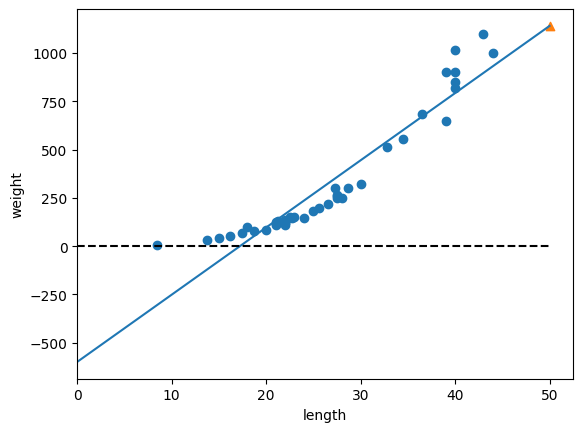

In [17]:
plt.figure()

plt.scatter(x_train, y_train)

#plot linear regression equation
plt.plot([0, 50], [lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])

# where y is 0 (dotted)
plt.plot([0, 50], [0, 0], "k--")

plt.scatter(50, 1140, marker = "^")

plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

Model Evaluation

In [18]:
lr.score(x_test, y_test)

0.9271799822044966

In [19]:
pred = lr.predict(x_test)

In [20]:
mae = mean_absolute_error(y_test, pred)

In [21]:
mae

69.442660631386

Polynomial linear regression

- actual weight of Perch is not modelled linearly, but has a non-linear relationship with length 
- might have better results if we use a quadratic equation to model the data 

In [22]:
df["squared"] = df["Length2"] ** 2

In [23]:
df.head()

,Species,Length2,Weight,squared
72,Perch,8.4,5.9,70.56
73,Perch,13.7,32.0,187.69
74,Perch,15.0,40.0,225.00
75,Perch,16.2,51.5,262.44
76,Perch,17.4,70.0,302.76


In [24]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "squared"]], 
                                                    df["Weight"], 
                                                    test_size=0.25, 
                                                    random_state=12)

In [27]:
x_test.head()

,Length2,squared
126,43.5,1892.25
123,42.0,1764.00
115,37.0,1369.00
80,19.6,384.16
98,24.6,605.16


In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

# more accurate than linear 

0.9499311979364474

In [30]:
pred = lr.predict(x_test)

In [31]:
mae = mean_absolute_error(y_test, pred)

In [34]:
mae
# less error compared to linear and KNN


49.08871494576859

In [36]:
lr.predict([[50, 2500]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1569.35155328])

In [37]:
print(lr.coef_, lr.intercept_)

[-26.75385736   1.08761771] 188.0001463677654


Equation:
- weight = -26.75 * Length2 + 1.08 * squared + 188
- y = 1.08x^2 - 26.75x + 188

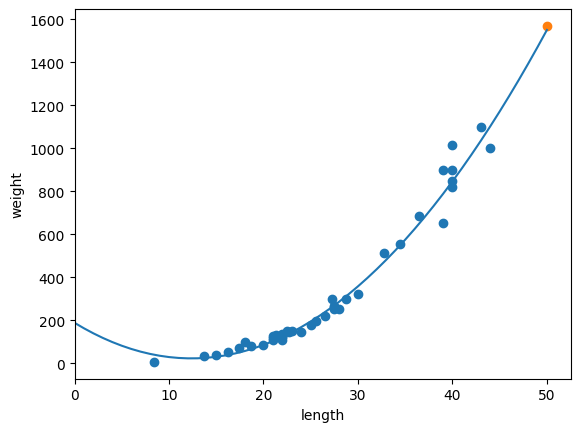

In [39]:
points = np.arange(0, 51)

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -26.75*points + 1.08 * points **2 + 188)
plt.scatter(50, 1569.35)

plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()